## Fit a line to min and max temparature data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import copy as cp
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
def add_to_front(a_list, a_number):
    tmp_list = [a_number] + cp.deepcopy(a_list)
    return tmp_list

In [3]:
# vectorize max and min temperature lists
max_temp_list = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp_list = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
max_temp_list = add_to_front(max_temp_list, 1)
min_temp_list = add_to_front(min_temp_list, 1)

temp_max = np.array(max_temp_list)
temp_min = np.array(min_temp_list)
months = np.arange(13)
days = np.linspace(0, 12, num=365)

In [4]:
print(temp_max)
print(temp_min)
print(months)
print(type(months))
print(days)

[ 1 39 41 43 47 49 51 45 38 37 29 27 25]
[ 1 21 23 27 28 32 35 31 28 21 19 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
<class 'numpy.ndarray'>
[ 0.          0.03296703  0.06593407  0.0989011   0.13186813  0.16483516
  0.1978022   0.23076923  0.26373626  0.2967033   0.32967033  0.36263736
  0.3956044   0.42857143  0.46153846  0.49450549  0.52747253  0.56043956
  0.59340659  0.62637363  0.65934066  0.69230769  0.72527473  0.75824176
  0.79120879  0.82417582  0.85714286  0.89010989  0.92307692  0.95604396
  0.98901099  1.02197802  1.05494505  1.08791209  1.12087912  1.15384615
  1.18681319  1.21978022  1.25274725  1.28571429  1.31868132  1.35164835
  1.38461538  1.41758242  1.45054945  1.48351648  1.51648352  1.54945055
  1.58241758  1.61538462  1.64835165  1.68131868  1.71428571  1.74725275
  1.78021978  1.81318681  1.84615385  1.87912088  1.91208791  1.94505495
  1.97802198  2.01098901  2.04395604  2.07692308  2.10989011  2.14285714
  2.17582418  2.20879121  2.24175824  2.27472527  

In [5]:
def transform_time(month_array):
    return np.c_[np.ones(month_array.shape[0]), month_array]

def least_squared(X, y):
    """Return the y intercept and slope using Ordinary Least Squared."""
    # transpose time
    xtx = np.dot(X.T, X)
    inv_xtx = np.linalg.inv(xtx)
    xty = np.dot(X.T, y)
    return np.dot(inv_xtx, xty)

In [6]:
adj_months = transform_time(months)
print(len(months))

13


In [7]:
max_params = least_squared(adj_months, temp_max)
min_params = least_squared(adj_months, temp_min)

print('For the max temperature data:')
print('Intercept: {} | Slope: {}'.format(max_params[0], max_params[1]))

print('For the min temperature data:')
print('Intercept: {} | Slope: {}'.format(min_params[0], min_params[1]))

For the max temperature data:
Intercept: 36.439560439560495 | Slope: -0.021978021978023676
For the min temperature data:
Intercept: 21.604395604395634 | Slope: 0.2582417582417573


In [8]:
temp_max[0] = max_params[0]
temp_min[0] = min_params[0]

print(temp_max)
print(temp_min)

[36 39 41 43 47 49 51 45 38 37 29 27 25]
[21 21 23 27 28 32 35 31 28 21 19 17 18]


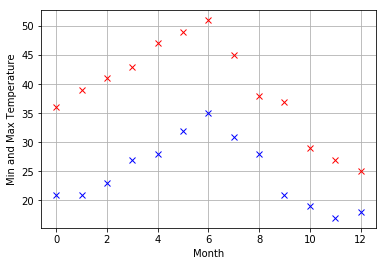

In [9]:
xname = 'Month'
yname = 'Min and Max Temperature'
max_format = 'rx'
min_format = 'bx'

plt.plot(months, temp_max, max_format)
plt.plot(months, temp_min, min_format)
plt.xlabel(xname)
plt.ylabel(yname)
plt.grid(True)
plt.show()

In [11]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [12]:
res_max, conv_max = opt.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, conv_min = opt.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

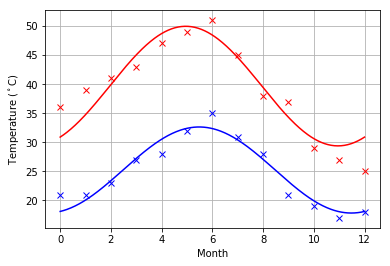

In [13]:
plt.figure()
plt.plot(months, temp_max, max_format)
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, min_format)
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.grid(True)
plt.show()